In [47]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

In [48]:
root_dir = "/home/joseph.bayley/public_html/CBC/vitamin_O4/BBH_1024Hz_1s_fullparam_polarisation/"

In [49]:
val_losses = {}
val_times = {}
nan_list = []
for direc in os.listdir(root_dir):
    dir_files = os.listdir(os.path.join(root_dir, direc))
    if "batch_inf_plot.png" in dir_files:
        nan_list.append(direc)
    if "loss.txt" in dir_files:
        with open(os.path.join(root_dir, direc, "loss.txt"),"r") as f:
            val_losses[direc] = np.loadtxt(f)[:,5]
    if "epochs_times.txt" in dir_files:
        with open(os.path.join(root_dir, direc, "epochs_times.txt"),"r") as f:
            val_times[direc] = np.loadtxt(f)

In [50]:
nan_list

['vitamin_c_run4_1024Hz_1s_64x32_32x16_32x16_16x6_1024',
 'vitamin_c_run4_1024Hz_1s_256x128_64x32_32x16_16x8_4096_valpolarised_trainnoiserand_convpadding',
 'vitamin_c_freq_1024Hz_1s_128x64_64x32_32x16_16x8_4096']

In [51]:
len(val_losses[list(val_losses.keys())[0]])

1400

# repeats

vitamin_c_run4_1024Hz_1s_128x64_32x32_32x16_16x8_4096_valpolarised -34.468688888549806


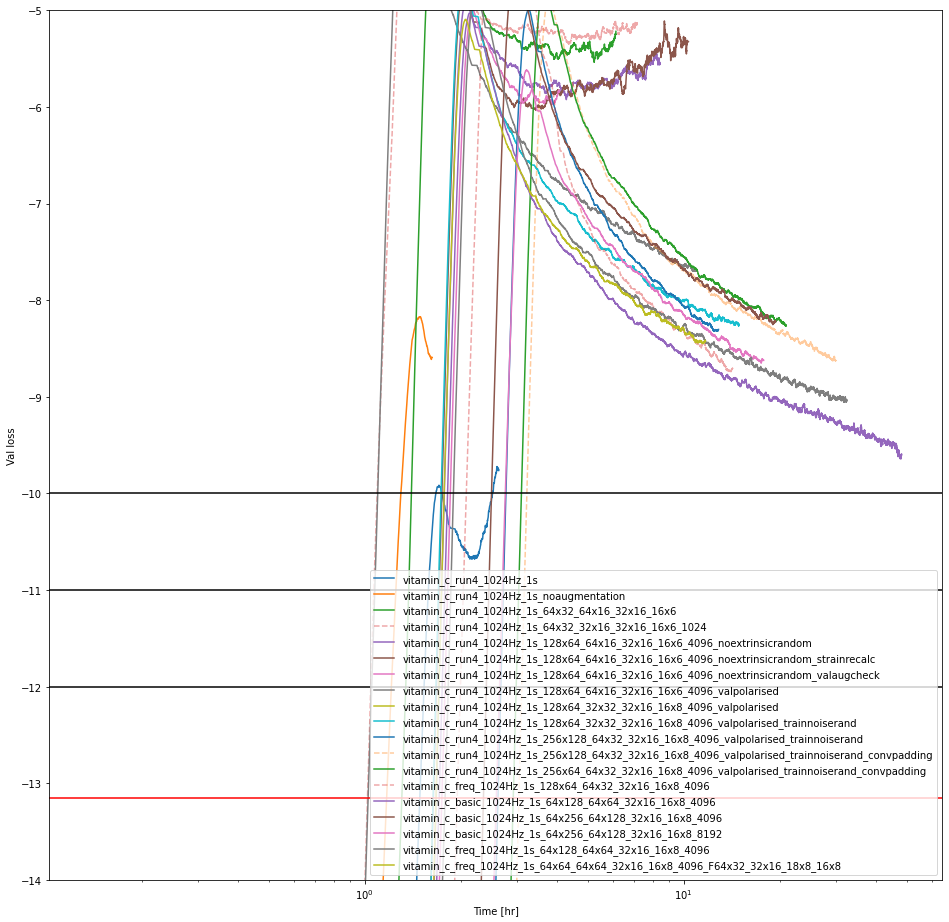

In [52]:
fig, ax = plt.subplots(figsize = (16,16))
stind = 100
minval = np.inf
minkey = ""
for key in list(val_losses.keys()):
    if "3linear4096_3conv128_32_32_16" not in key or "ramp300" in key or "ramp500" in key:
        pass
    dat = val_losses[key][stind:]
    tms = np.cumsum(val_times[key][1:])[stind:]
    smoothdat = uniform_filter1d(dat, size=100)

    if smoothdat[-1] < minval:
        minval = smoothdat[-1]
        minkey = key
    if smoothdat[-1] > -1:
        continue
    if key in nan_list:
        pass
        #ax.plot(tms/3600.,smoothdat, label = key, color = "k", alpha = 0.4)
        ax.plot(tms/3600.,smoothdat, label = key, alpha = 0.4, ls = "--")
    else:
        try:
            ax.plot(tms/3600.,smoothdat, label = key)
        except:
            ax.plot(tms/3600.,smoothdat[100:], label = key)
    
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("Time [hr]")
ax.set_ylabel("Val loss")
for i in [-10,-11,-12]:
    ax.axhline(i,color="k")
ax.set_ylim([-14, -5])
ax.axhline(-13.15,color="r")
print(minkey, minval)

Text(0, 0.5, 'Val loss')

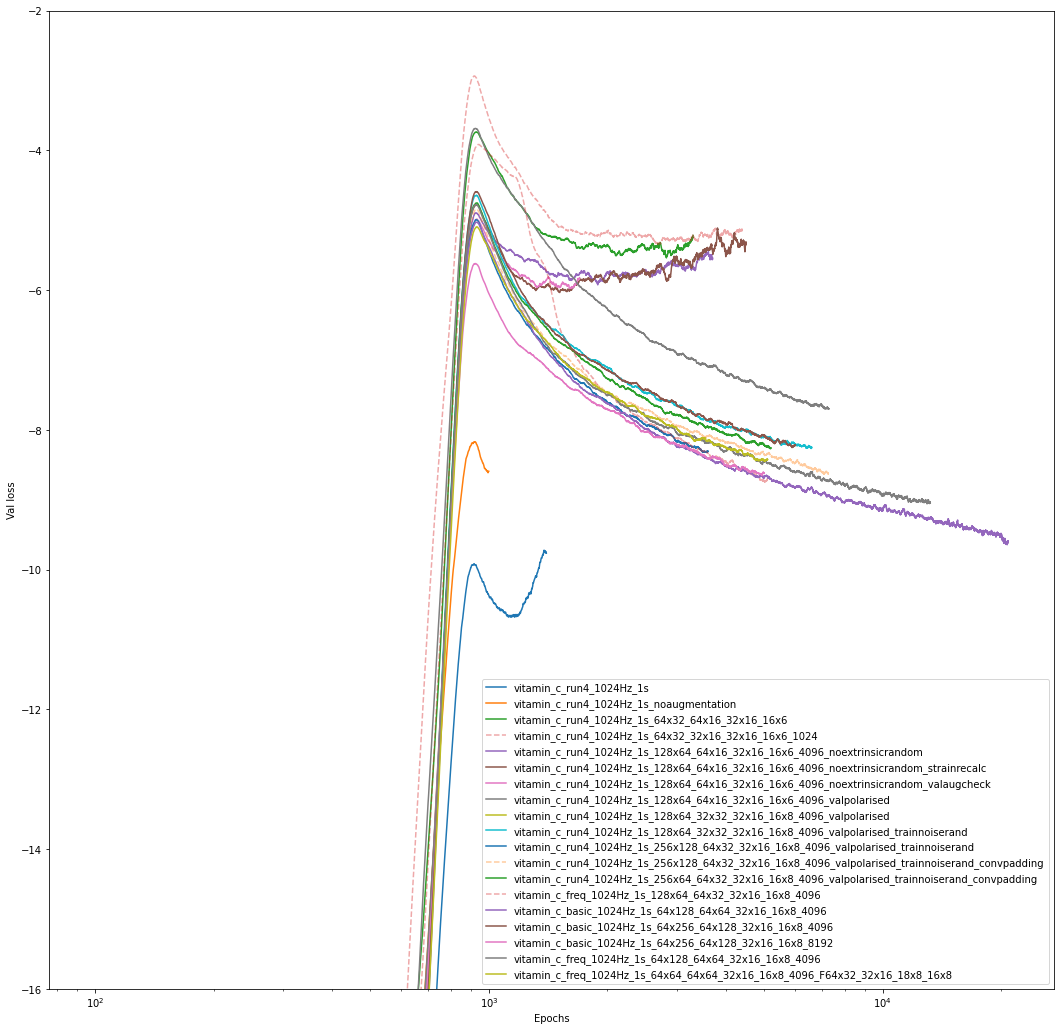

In [53]:
fig, ax = plt.subplots(figsize = (18,18))
stind = 100
for key in val_losses:
    if "multi" in key:
        continue
    xdat = np.arange(len(val_losses[key]))[stind:]
    dat = val_losses[key][stind:]
    smoothdat = uniform_filter1d(dat, size=100)
    if smoothdat[-1] > -1:
        continue
    if key in nan_list:
        ax.plot(xdat, smoothdat, label = key, ls = "--", alpha = 0.4)
    else:
        ax.plot(xdat, smoothdat, label = key)
        
ax.set_ylim([-16,-2])
    
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Val loss")

# batchnorm repeats

No handles with labels found to put in legend.


 inf


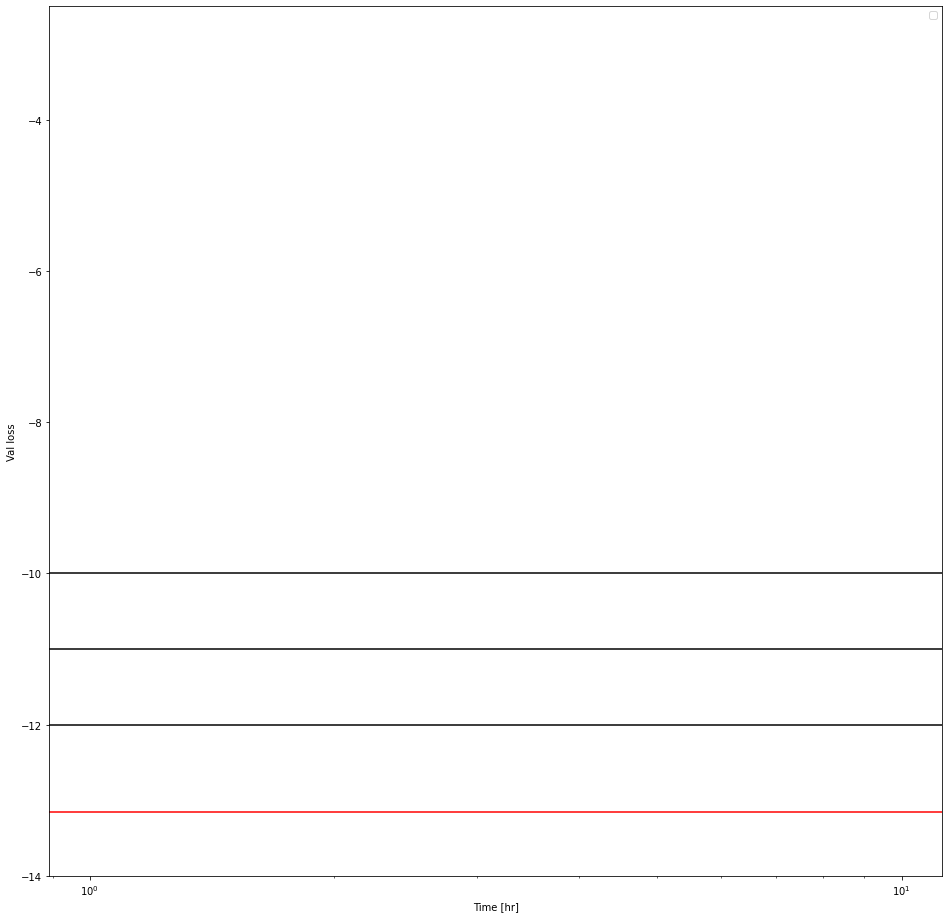

In [33]:
fig, ax = plt.subplots(figsize = (16,16))
stind = 500
minval = np.inf
minkey = ""
for key in list(val_losses.keys()):
    if "batchnorm" not in key and key != "vitamin_c_run0_1024_1s_3linear4096_3conv128_32_32_16":
        continue
    try:
        dat = val_losses[key][stind:]
        tms = np.cumsum(val_times[key][1:])[stind:]
        smoothdat = uniform_filter1d(dat, size=100)

        if smoothdat[-1] < minval:
            minval = smoothdat[-1]
            minkey = key
        if smoothdat[-1] > -1:
            continue
        if key in nan_list:
            pass
            #ax.plot(tms/3600.,smoothdat, label = key, color = "k", alpha = 0.4)
            ax.plot(tms/3600.,smoothdat, label = key, alpha = 0.4, ls = "--")
        else:
            ax.plot(tms/3600.,smoothdat, label = key)
    except:
        pass
    
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("Time [hr]")
ax.set_ylabel("Val loss")
for i in [-10,-11,-12]:
    ax.axhline(i,color="k")
ax.set_ylim([-14, -2.5])
ax.axhline(-13.15,color="r")
print(minkey, minval)

# all runs

times different length to data: vitamin_kaggle_run0_1024_1s_4conv128_64_32_16_jointm1m2_ramp400_noregularization_AdamW
vitamin_basic_run0_1024_1s_4conv128_64_32_16_jointm1m2_ramp400_noregularization_AdamW -12.747606506347656


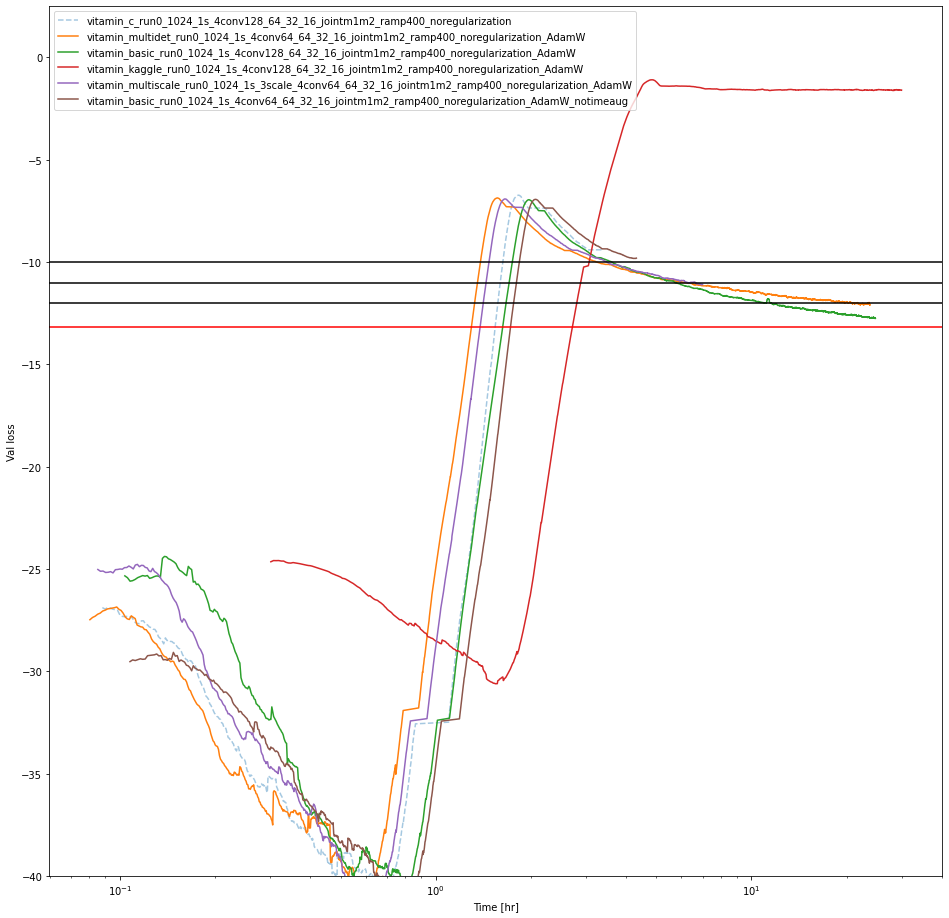

In [6]:
fig, ax = plt.subplots(figsize = (16,16))
stind = 50
minval = np.inf
minkey = ""
for key in list(val_losses.keys()):
    if len(val_losses[key]) < stind:
        print("not at start", key)
        continue
        
    dat = val_losses[key][stind:]
    tms = np.cumsum(val_times[key][1:])[stind:]
    if len(dat) == 0:
        print("not at start", key)
        continue
    if len(dat) != len(tms):
        print("times different length to data:", key)
        dat = dat[len(dat) - len(tms):]
    #tms = np.cumsum(val_times[key][101:])[stind:]
    smoothdat = uniform_filter1d(dat, size=100)

    if smoothdat[-1] < minval:
        minval = smoothdat[-1]
        minkey = key
    if smoothdat[-1] > -1:
        continue
    if key in nan_list:
        pass
        #ax.plot(tms/3600.,smoothdat, label = key, color = "k", alpha = 0.4)
        ax.plot(tms/3600.,smoothdat, label = key, alpha = 0.4, ls = "--")
    else:
        ax.plot(tms/3600.,smoothdat, label = key)
    
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("Time [hr]")
ax.set_ylabel("Val loss")
for i in [-10,-11,-12]:
    ax.axhline(i,color="k")
ax.set_ylim([-40, 2.5])
ax.axhline(-13.15,color="r")
print(minkey, minval)

In [34]:
m1 = 10
m2 = 100

In [35]:
chirp_mass = ((m1*m2)**(3./5))/((m1+m2)**(1./5))
q = m1/m2

In [36]:
m2_re = chirp_mass*((1 + q)/(q**3))**(1./5)

In [37]:
m1_re = m2*q

In [38]:
print(chirp_mass, q)
print(m1,m2)
print(m1_re,m2_re)

24.644582371178927 0.1
10 100
10.0 99.99999999999999
